<center>

## Predictive Analytics

### ALY 6020, CRN 80405

### Professor Vladimir Shapiro

### Module 1 Assignment: Understanding Income Inequality

#### Submitted By - Richa Umesh Rambhia


---

## **Implementation of Nearest Neighbors** - Income Inequality Analysis



---

</center>

# Table of Contents

### 1.   Introduction
### 2.   Analysis
### 3.   Results
### 4.   Conclusion
### 5.   References

# **Introduction**

### **Understanding Income Inequality**


---



The **census data** about attributes of US citizens is a collection of demographic information that was gathered by the US Census Bureau. It includes several attributes such as *age, gender, race, job role, income, degree, etc.* which are features that help in analyzing the data in order to understand and classify the **group of income categories.**

The aim is to develop a model in order to test how well the data can be differentiated between the people with low and high incomes, such that we understand which features contribute to the affluency and how the policies in the US can be improved. **KNN model** is implemented to classify the low income citizens from the high income citizens where the categories are as follows.


1.   Low Income: <= $50,000

2.   High Income: > $50,000

In order to efficiently classify these categories into groups and understand what features or parameters influence the classification, the **income column** of the dataset is taken into consideration which will be the dependent variable.

Ultimately, the questions that will be answered after the implementation of the model are as below.

1. Accuracy between the models built for various values of 'K'

2. A recommendation to the US government regarding whether or not to use the model created in order to understand if the pay is equal or not


# **Analysis**



---



### **Installing required packages**

In [2]:
!pip install pandas_profiling
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=3b63a1f0fcca7cfe46777c797be0e1329486e767730be

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.3/110.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 8.7 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2455 sha256=8edbf8c670ba9d7399b73a2afdcf0cf43c474f868417329ebd5be6f76b4f0dd6
  Stored in directory: /root/.cache/pip/wheels/e3/dc/eb/3a9468e9322c8284d7a53eab23e7a4bab6f271fff7a5871e2f
Successfully built feather-format
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.

### **Importing libraries**

In [1]:
import pandas as pd
from numpy import nan
import pandas_profiling
import ydata_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from featurewiz import featurewiz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### **Loading the dataset**

In [3]:
income_data = pd.read_csv("adult-all (1).csv")
income_data

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States
48838,64,?,321403,HS-grad,9,Widowed,?,Black,Male,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


<center> <i> Table 1. Income Inequality Data </center> </i>

----

### **Exploratory Data Analysis**

EDA is performed on the data in order to analyze various parameters and features of the dataset and to understand the *structure* of the dataset such that various *trends and patterns* between the variables is known. Exploratory Data Analysis helps in understanding the *relationship between the various independent and dependent variables* of the dataset that would further be useful in building the model.



---



#### **Descriptive Analysis**

In [14]:
# displaying number of rows and columns
print("Total number of Rows and Columns:", income_data.shape)

print("\n-------------------------------------------------------")

# displaying field values/column names
print("\nColumn Names:\n") 
income_data.columns

Total number of Rows and Columns: (48842, 10)

-------------------------------------------------------

Column Names:



Index(['Age', 'Role', 'Income', 'Degree', 'Oldest_Child', 'Marital_Status',
       'Job', 'Race', 'Gender', 'Born'],
      dtype='object')

In [15]:
# displaying data types
print("Data types:\n")
income_data.dtypes

Data types:



Age                int64
Role              object
Income             int64
Degree            object
Oldest_Child       int64
Marital_Status    object
Job               object
Race              object
Gender            object
Born              object
dtype: object

From the *descriptive analysis*, it is observed that there are total **48842 rows** **of data** and **10 field values** and the data type for each of the field value is displayed in order to understand what data type values are present in the dataset.

Here, **3** of the values are **numerical data type** and remaining field values are of **object type**, which needs to be updated to **category** type later in the preprocessing stage.

#### **Statistical Analysis**

In [16]:
# dataset info
print("Dataset Info:\n")
income_data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Role            48842 non-null  object
 2   Income          48842 non-null  int64 
 3   Degree          48842 non-null  object
 4   Oldest_Child    48842 non-null  int64 
 5   Marital_Status  48842 non-null  object
 6   Job             48842 non-null  object
 7   Race            48842 non-null  object
 8   Gender          48842 non-null  object
 9   Born            48842 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.7+ MB


<center> <i> Table 2. Information about the dataset </center> </i>

In [17]:
# describing the dataset
print("Describing the dataset:\n")
round(income_data.describe(),1)

Describing the dataset:



,Age,Income,Oldest_Child
count,48842.0,48842.0,48842.0
mean,38.6,189664.1,10.1
std,13.7,105604.0,2.6
min,17.0,12285.0,1.0
25%,28.0,117550.5,9.0
50%,37.0,178144.5,10.0
75%,48.0,237642.0,12.0
max,90.0,1490400.0,16.0


<center> <i> Table 3. Dataset Description </center> </i>

*Statistical Analysis* helps in understanding about each of the numerical field type based on the **total count values, minimum value, maximum value, standard deviation**, etc. which gives an overall analysis of the field data about the various rows of data present in the dataset.

For example, as observed we see that the *age field* has **age of 90 as the maximum value and 17 as the minimum age value present in the dataset**.

### **Data Profiling**

In [37]:
income_profile_report = income_data.profile_report(title='Income Inequality Analysis Report', explorative = True)
income_profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
# Saving the profile report 
income_profile_report.to_file(output_file="Income Inequality Analysis Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The data profiling report generated for the dataset helps in understanding various parameters such as the data type of the field values, the missing and duplicate values present in the dataset, the correlation between each of the field value, and the analysis of each of the field value on a individual basis.

From the profiling report, it is observed that there are **3 numerical variable type and 7 categorical data type**. Also, there are no missing values in the dataset and the **percentage of duplicate rows present is 0.4%**, i.e., **209 rows of data are duplicate.** The missing values matrix also displays that there are no missing values present in the dataset, and for each field value a separate visualization is displayed in order to specifially analysis a particular field value.

### **Task 1: Data Cleaning**


---

Use proper data cleansing techniques to ensure you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data. This includes the following:

1.   Checking if there are missing or bad values
2.   Checking for outliers
3.   Checking for data types and making sure they are correct


---



**1. Checking for null values in each column of the dataset, i.e., missing or bad values**

In [18]:
for x in range(10):
    print("%-45s %10d" % (income_data.columns.values[x], income_data.iloc[:,x].isna().sum()))

Age                                                    0
Role                                                   0
Income                                                 0
Degree                                                 0
Oldest_Child                                           0
Marital_Status                                         0
Job                                                    0
Race                                                   0
Gender                                                 0
Born                                                   0


<center> <i> Table 4. Missing Values Count </center> </i>

The code above shows that there are **no missing values** present in the dataset. The **isna()** function is used in order to display the Null or NA values that are present in each of the field values of the dataset.

In [19]:
# displaying the starting rows of the dataset

print("Displaying the first 10 rows of data")
income_data.head()

Displaying the first 10 rows of data


,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba


<center> <i> Table 5. First 10 rows of the dataset </center> </i>

In [20]:
# displaying the end rows of the dataset

print("Displaying the last 10 rows of data")
income_data.tail()

Displaying the last 10 rows of data


,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States
48838,64,?,321403,HS-grad,9,Widowed,?,Black,Male,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States


<center> <i> Table 6. Last 10 rows of the dataset </center> </i>

**Replacing bad values with a suitable data**

In [4]:
# replacing bad values with a value
income_data['Role'] = income_data['Role'].replace('?', 'Not Known')
income_data['Degree'] = income_data['Degree'].replace('?', 'Not Known')
income_data['Marital_Status'] = income_data['Marital_Status'].replace('?', 'Not Known')
income_data['Job'] = income_data['Job'].replace('?', 'Not Known')
income_data['Race'] = income_data['Race'].replace('?', 'Not Known')
income_data['Gender'] = income_data['Gender'].replace('?', 'Not Known')
income_data['Born'] = income_data['Born'].replace('?', 'Not Known')

print("Replace successful.")

Replace successful.


As observed in the starting and ending rows of the dataframe, there are bad values present in the dataset. For example, **'?'** is used where the data for a particular field of value which is not known. But in order to build an accurate model, it is important the data is of good quality and hence, the **'?' is replaced by 'Not Known' value in the dataset.**

In [22]:
income_data

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba
...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States
48838,64,Not Known,321403,HS-grad,9,Widowed,Not Known,Black,Male,United-States
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States


<center> <i> Table 7. Cleaned Dataframe </center> </i>

**2. Checking for outliers in the dataset**

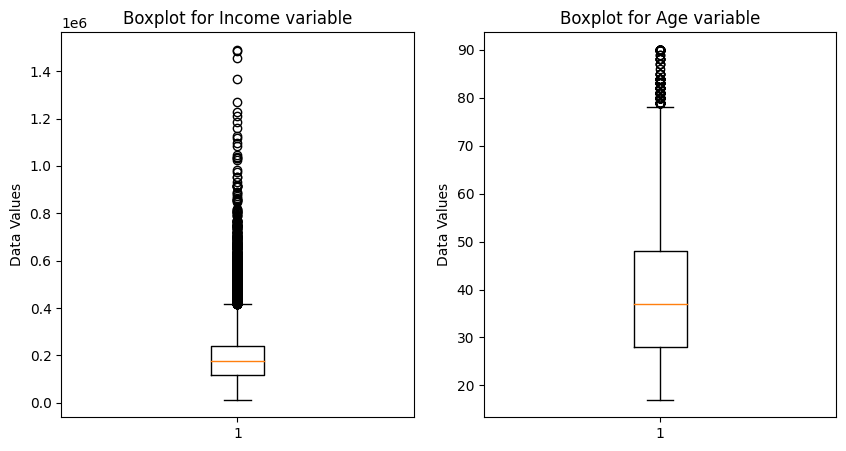

In [23]:
# creating boxplot for 'Income' and 'Age' variable

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].boxplot(income_data['Income'])
axs[1].boxplot(income_data['Age'])
axs[0].set_title('Boxplot for Income variable')
axs[1].set_title('Boxplot for Age variable')
axs[0].set_ylabel('Data Values')
axs[1].set_ylabel('Data Values')
plt.show()

##### <center> <b> <i> Figure 1. Boxplot for Income & Age Variable </center> </b> </i>

The above code creates **two boxplots**, one for the *income variable* and the second for the *age variable* of the income_data dataset, indicating that there are some outliers present in the data values of age and income variable. These outliers will not be removed for the dataset as each of the data point for the age and income variable is important for analysis.

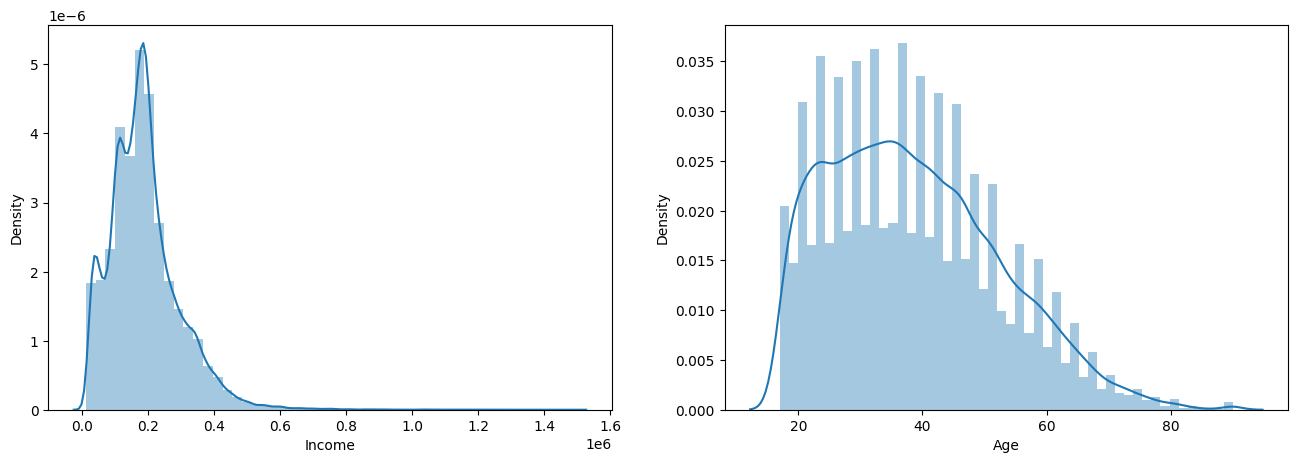

In [24]:
# distribution plot for the features of the dataset

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(income_data['Income'])
plt.subplot(1,2,2)
sns.distplot(income_data['Age'])
plt.show()

##### <center> <b> <i> Figure 2. Distribution Plot for Income & Age Variable </center> </b> </i>

The distribution of data plotted for the income and age values gives an overview of the outliers present and the distribution of the data points across present in the dataset. The plot for income and age show that the data 
for both the field values is skewed. The income variable is left skewed from 0.0 to 0.6 whereas the age variable is also left skewed for values ranging from 20 to 80.

**3. Checking for data types**

In [5]:
# correcting the data types for the variables of the dataset

income_data['Role'] = income_data['Role'].astype('category')
income_data['Degree'] = income_data['Degree'].astype('category')
income_data['Marital_Status'] = income_data['Marital_Status'].astype('category')
income_data['Job'] = income_data['Job'].astype('category')
income_data['Race'] = income_data['Race'].astype('category')
income_data['Gender'] = income_data['Gender'].astype('category')
income_data['Born'] = income_data['Born'].astype('category')

print("Data Type conversion successful.")

Data Type conversion successful.


In [26]:
# checking for the correct data type of the variable
print("Data types:\n")
income_data.dtypes

Data types:



Age                  int64
Role              category
Income               int64
Degree            category
Oldest_Child         int64
Marital_Status    category
Job               category
Race              category
Gender            category
Born              category
dtype: object

<center> <i> Table 8. Data Type Conversion </center> </i>

As it was earlier observed that the data type for some of the field values are incorrect, the above code helps to convert the data type of the variable as per the requirement and values present in the dataset. **'dtypes'** function is used for converting the data type to a desired type where all the **categorical variables** which were of **object type** are now converted to **category type**.

### **Task 2: Analyzing dependent and independent variables**



---



Designate a dependent variable that would be useful to separate the individuals by income.


---



In [6]:
income_data['Income_ClassifyValues'] = income_data['Income'].apply(lambda x: 1 if x > 50000 else 0)
print("Designated values to dependent variable.")

Designated values to dependent variable.


The dependent variable that would be useful to categorize the citizens by income groups is the "**income**" column, that contains information about the annual income of each citizen. The income column can be used to classify individuals into two groups, those with income of less than or equal to 50,000 dollar and those with income of more than 50,000 dollar. 

This variable can be used as the **target variable** for building a classification model in order to predict the income group, and thus the income variable is designated as the dependent variable, where the above code is used to group the classes into *binary values for classification*.

### **Task 3: Exploratory Analysis and Pre-Modeling steps**


---


Perform exploratory analysis on the dataset. Look at correlations, and train/test split your dataset. When looking at the correlations, look for interesting/telling relationships. For Example: Is there a relationship between gender and income?


---



#### **Creating a new dataframe for pre-modeling steps**

In [7]:
new_income_data = pd.DataFrame()
new_income_data['Age'] = income_data['Age']
new_income_data['Role'] = income_data['Role']
new_income_data['Income_ClassifyValues'] = income_data['Income_ClassifyValues']
new_income_data['Degree'] = income_data['Degree']
new_income_data['Oldest_Child'] = income_data['Oldest_Child']
new_income_data['Marital_Status'] = income_data['Marital_Status']
new_income_data['Job'] = income_data['Job']
new_income_data['Race'] = income_data['Race']
new_income_data['Gender'] = income_data['Gender']
new_income_data['Born'] = income_data['Born']

print("New Dataframe Created!")

New Dataframe Created!


#### **Feature Selection and Extraction**

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (48842, 10)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
###############################

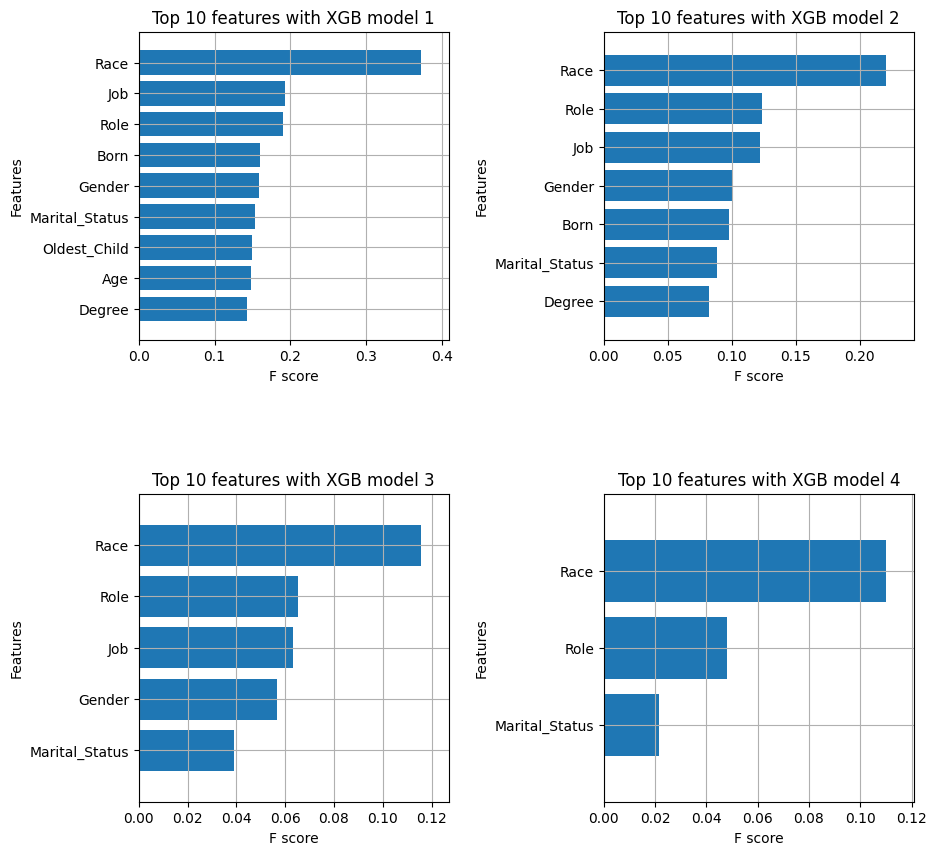

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['Race', 'Job', 'Role', 'Born']
Total Time taken for featurewiz selection = 2 seconds
Output contains a list of 4 important features and a train dataframe


In [139]:
# Feature Extraction

target = 'Income_ClassifyValues'

features, train = featurewiz(new_income_data, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

<center> <i> Feature Selection & Extraction Report <center> </i>

The above code generated a feature selection & extraction report using the '**featurewiz**' function that helps in understanding which features or parameters are to be taken into consideration for the classification of the model where the target variable is the '**income**' column.

In [140]:
print("The extracted features are:")
features

The extracted features are:


['Race', 'Job', 'Role', 'Born']

The features that were selected by the featurewiz function where the target variable is the income column are:



1.   Race
2.   Job
3.   Role
4.   Born



These features will be considered for the model building step to classify the income category and predict the income of the citizen as it is analyzed that these are the features that influence the classification of the income variable.

### **Label Encoding**

In [8]:
labelencoder = LabelEncoder()

income_data['Role_Label'] = labelencoder.fit_transform(income_data["Role"])
income_data['Degree_Label'] = labelencoder.fit_transform(income_data["Degree"])
income_data['Marital_Status_Label'] = labelencoder.fit_transform(income_data["Marital_Status"])
income_data['Job_Label'] = labelencoder.fit_transform(income_data["Job"])
income_data['Race_Label'] = labelencoder.fit_transform(income_data["Race"])
income_data['Gender_Label'] = labelencoder.fit_transform(income_data["Gender"])
income_data['Born_Label'] = labelencoder.fit_transform(income_data["Born"])

Since the selected features for classification are categorical data and most of the ML models for classification require the data to be numerical or binary, it is important that these features are converted into **binary** or **numerical** type data in order for the model to be able to classify the classes. 

**Label Encoding** is a method which helps to **convert the categorical variables** into **numerical values**, thus helping to transform the data point into a format where the algorithm is able to process the data for classification. *LabelEncoder()* function is used to encode the categorical type data to numerical type, where new columns of data are created for the categorical field value in the dataset which will be used in the training of the model.

In [30]:
income_data

,Age,Role,Income,Degree,Oldest_Child,Marital_Status,Job,Race,Gender,Born,Income_ClassifyValues,Role_Label,Degree_Label,Marital_Status_Label,Job_Label,Race_Label,Gender_Label,Born_Label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,White,Male,United-States,1,7,9,4,0,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,United-States,1,6,9,2,3,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,United-States,1,4,11,0,5,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,United-States,1,4,1,2,5,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,Cuba,1,4,9,2,10,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,White,Female,United-States,1,4,9,0,10,4,0,39
48838,64,Not Known,321403,HS-grad,9,Widowed,Not Known,Black,Male,United-States,1,3,11,6,7,2,1,39
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,White,Male,United-States,1,4,9,2,10,4,1,39
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Asian-Pac-Islander,Male,United-States,1,4,9,0,0,1,1,39


<center> <i> Table 9. Income Dataset after Label Encoding </center> </i>

In [31]:
income_data.columns

Index(['Age', 'Role', 'Income', 'Degree', 'Oldest_Child', 'Marital_Status',
       'Job', 'Race', 'Gender', 'Born', 'Income_ClassifyValues', 'Role_Label',
       'Degree_Label', 'Marital_Status_Label', 'Job_Label', 'Race_Label',
       'Gender_Label', 'Born_Label'],
      dtype='object')

-----

### **Corelation Plot**


---
A **correlation plot** or matrix is a *visual representation of the variables* present in the dataset which helps in understanding the *relationship* between the different variables and how highly the variables are corelated to each other. 

The values of the correlation plot range from **-1 to 1**, where -1 indicates a **negative correlation** between the variables, 0 indicates **no correlation**, and 1 indicates a **positive correlation**. 

The variables that have positive correlation are said to be highly correlated to each and hence either of the two variables must be removed for the model building as it may lead to **multicollinearity** where the efficiency of the model may reduce. 


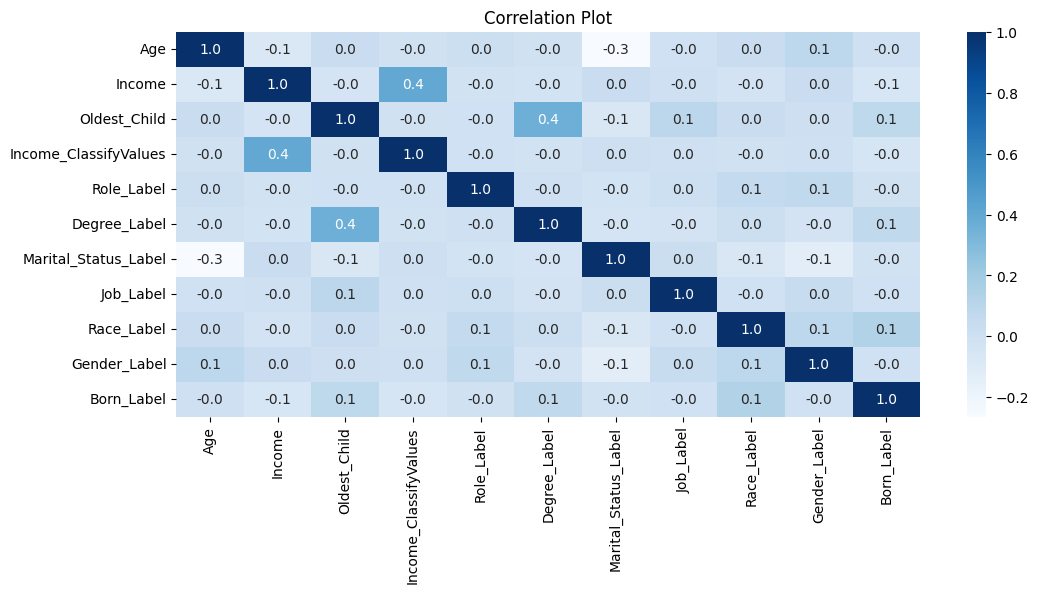

In [32]:
# plotting correlation matrix 

plt.figure(figsize = (12,5))
ax = plt.subplot()
sns.heatmap(income_data.corr(),annot=True, fmt='.1f', ax=ax, cmap="Blues")
ax.set_title('Correlation Plot');

##### <center> <b> <i> Figure 3. Correlation Plot </center> </b> </i>


#### **Looking for corelations between independent & dependent variables**

---


Considering the correlation between the variables **'Gender' and 'Income'**, it is observed that the correlation value is 0.0, which indicates that there is **no correlation** between the two variables. 
Similarly, **'Role' & 'Degree'** and negatively correlated to the '**Income**' parameter with correlation value of -0.0, indicating that they are associated to lower values of income data.


#### **Features selected for model building**


---

As observed in the correlation matrix above, **'Degree' and 'Oldest_Child'** parameters are **highly correlated** to each other with a correlation value of **0.4**, and hence in order to avoid multicollinearity and build an efficient model, both of these variables are excluded from the features to be selected for training of the model. 

The features that are selected for the model building are as follows:


1.   Features selected from feature extraction; **Race, Job, Born, and Role**
2.   Remaining features left; **Age, Marital_Status, and Gender**

### **Task 4: Model Building**


---

Build three nearest neighbor models with the given data, using K= 3, 7, 10.


---






#### **Model Building - Iteration 1**

**Defining the features for model building**


---

The model is trained & built on the below mentioned features which includes the *features selected by the featurewiz function* and the *remaining features* of the dataset *excluding Degree and Oldest_Child* as they are highly correlated to each other.

In [9]:
X = income_data[['Age', 'Role_Label', 'Marital_Status_Label', 'Job_Label', 'Race_Label', 'Gender_Label', 'Born_Label']]
y = income_data['Income_ClassifyValues']

**Splitting the dataset into train & test data**


---

The dataset is split into training and testing data with a random split of **80%** train set and **20%** for test data. 


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

**Standardizing the training & testing data**

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### **1. KNN Model with K=3**

In [12]:
knn_model1 = KNeighborsClassifier(n_neighbors=3)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_pred1 = knn_model1.predict(X_test)

**Accuracy of the model**

In [38]:
result1 = accuracy_score(y_test,y_pred1)
print("\nAccuracy of model (K=3):",result1)


Accuracy of model (K=3): 0.9093049442112806


**Classification Report**

In [39]:
cr_result1 = classification_report(y_test, y_pred1)
print("Classification Report:\n")
print (cr_result1)

Classification Report:

              precision    recall  f1-score   support

           0       0.12      0.05      0.07       681
           1       0.93      0.97      0.95      9088

    accuracy                           0.91      9769
   macro avg       0.53      0.51      0.51      9769
weighted avg       0.88      0.91      0.89      9769



<center> <i> Table 10. Classification Report (K=3) </center> </i>

**Confusion Matrix**

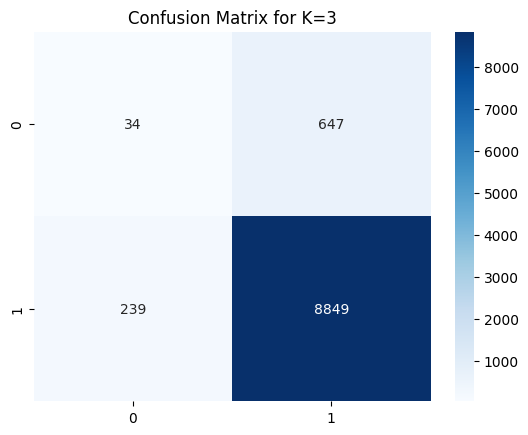

In [40]:
confusionmatrix_result1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(confusionmatrix_result1, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for K=3")
plt.show()

##### <center> <b> <i> Figure 4. Confusion Matrix (K=3) </center> </b> </i>

-----

### **2. KNN Model with K=7**

In [13]:
knn_model2 = KNeighborsClassifier(n_neighbors=7)
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred2 = knn_model2.predict(X_test)

**Accuracy of the model**

In [43]:
result2 = accuracy_score(y_test,y_pred2)
print("\nAccuracy of model (K=7):",result2)


Accuracy of model (K=7): 0.9283447640495445


**Classification Report**

In [44]:
cr_result2 = classification_report(y_test, y_pred2)
print("Classification Report:\n")
print (cr_result2)

Classification Report:

              precision    recall  f1-score   support

           0       0.21      0.01      0.02       681
           1       0.93      1.00      0.96      9088

    accuracy                           0.93      9769
   macro avg       0.57      0.50      0.49      9769
weighted avg       0.88      0.93      0.90      9769



<center> <i> Table 11. Classification Report (K=7) </center> </i>

**Confusion Matrix**

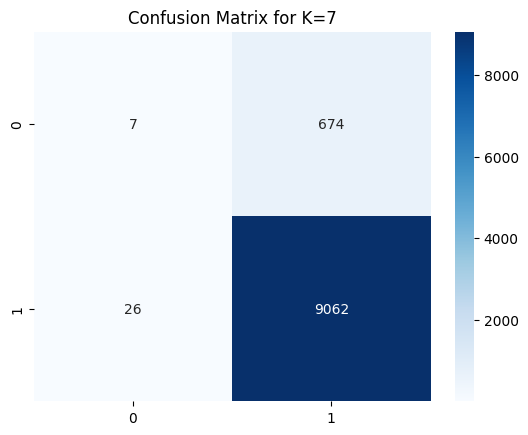

In [45]:
confusionmatrix_result2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(confusionmatrix_result2, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for K=7")
plt.show()

##### <center> <b> <i> Figure 5. Confusion Matrix (K=7) </center> </b> </i>

------

### **3. KNN Model with K=10**

In [14]:
knn_model3 = KNeighborsClassifier(n_neighbors=10)
knn_model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_pred3 = knn_model3.predict(X_test)

**Accuracy of the model**

In [49]:
result3 = accuracy_score(y_test,y_pred3)
print("\nAccuracy of model (K=10):",result3)


Accuracy of model (K=10): 0.9291636810318354


**Classification Report**

In [50]:
cr_result3 = classification_report(y_test, y_pred3)
print("Classification Report:\n")
print (cr_result3)

Classification Report:

              precision    recall  f1-score   support

           0       0.34      0.02      0.03       681
           1       0.93      1.00      0.96      9088

    accuracy                           0.93      9769
   macro avg       0.64      0.51      0.50      9769
weighted avg       0.89      0.93      0.90      9769



<center> <i> Table 12. Classification Report (K=10) </center> </i>

**Confusion Matrix**

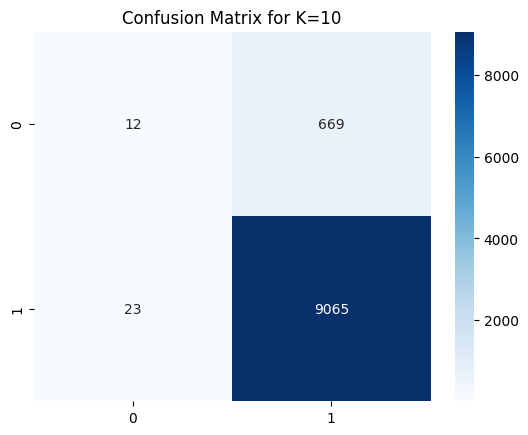

In [51]:
confusionmatrix_result3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(confusionmatrix_result3, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix for K=10")
plt.show()

##### <center> <b> <i> Figure 6. Confusion Matrix (K=10) </center> </b> </i>

#### **Model Building - Iteration 2**

#### **Minimizing the features for better model efficiency**


---



The parameters 'Age', 'Marital_Status', and 'Gender' Labels are excluded from model training to check the accuracy of the model. Thus, the features extracted by the feature selection function are only taken into consideration for model building in the second iteration.

**Defining the features for model building**

In [15]:
X1 = income_data[['Role_Label', 'Job_Label', 'Race_Label', 'Born_Label']]
y1 = income_data['Income_ClassifyValues']

**Spliting the dataset into train & test data**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state = 0, stratify=y1)

**Standardizing the training & testing data**

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**KNN Model Building for K=3,7,10**

Accuracy with K=3: 0.92875422254069




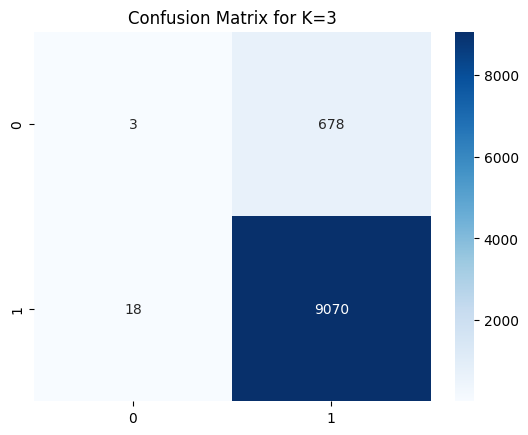

------------------------------------------------------------------------------
Accuracy with K=7: 0.9303920565052718




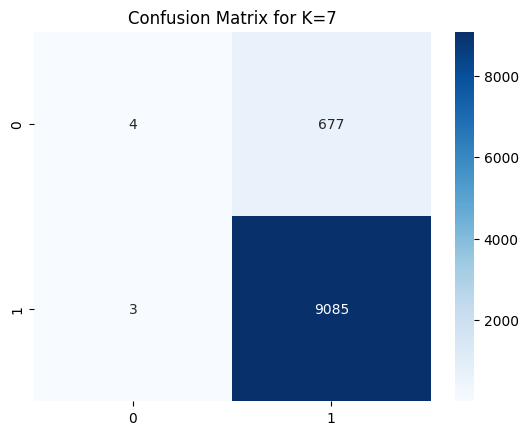

------------------------------------------------------------------------------
Accuracy with K=10: 0.930187327259699




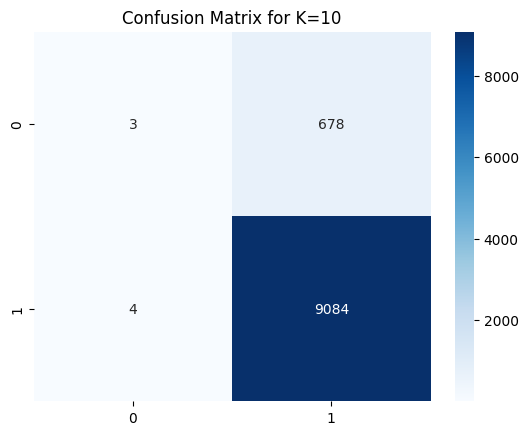

------------------------------------------------------------------------------


In [55]:
for k in [3, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with K={k}: {accuracy}")
    print("\n")
    confusionmatrix_result = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusionmatrix_result, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Confusion Matrix for K={k}")
    plt.show()
    print("------------------------------------------------------------------------------")

##### <center> <b> <i> Figure 7. Accuracy & Confusion Matrix for K=3,7,10 </center> </b> </i>

# **Results**


---



Interpret the results, and convey those results to stakeholders. Key points to focus on are:

1.   Accuracy between the models (was one more accurate than the other)
2.   Ultimately, would you recommend the US government use this model to understand if the pay is equal?


---

---
**Q1.** What is the accuracy between the models?

**A1.** The accuracy of the models built for K=3,7,10 and for the various features taken into consideration for training are as follows:


**Accuracy of the model with features ['Age', 'Role_Label', 'Marital_Status_Label', 'Job_Label', 'Race_Label', 'Gender_Label', 'Born_Label']**


1.   K=3; Accuracy of the model: 90.93%
2.   K=7; Accuracy of the model: 92.83%
3.   K=10; Accuracy of the model: 92.91%


**Accuracy of the model with features ['Role_Label', 'Job_Label', 'Race_Label', 'Born_Label']**

1.   K=3; Accuracy of the model: 92.88%
2.   K=7; Accuracy of the model: 93.04%
3.   K=10; Accuracy of the model: 93.02%

  
As it is observed, that there is varying accuracy between the models and also the features taken for training play an important role in determining the efficiency of the model. 

In the first iteration, we observe that the model accuracy is more when **K=10** but in the second iteration accuracy is slightly more for **K=7**. Overall, we can conclude that the second iteration of model building with 4 features gave accurate results and the *highest accuracy* obtained is **93.04%**, when *K=7 and independent variables selected are, [Role, Job, Race, Born]*, which are features selected by the featurewiz function.



> Considering another evaluation metric for measuring the performance of the model, i.e., **confusion matrix**, it is observed that the classes are accurately classified into the correct classes when K=7 in the second iteration, i.e., **9085 data points are correctly classified as high income category**.

Thus, we can conclude that the model with K=7 is better suited for classification of income categories as compared to the other models.

---

---

**Q2.** Would you recommend the US government to use this model to understand if the pay is equal?

**A2.**
Yes, I would recommend the US government to use this model in order to understand whether or not the pay is equal based on the classification of the income categories. Also, when considering the current state of equal pay, it is observed that despite there have been efforts taken in order to ensure equal pay for citizens, research and articles show that there is still a pay gap in the US which is based on various factors, that could be gender, born, and age. In other cases, there have been studies showing that there has been a significant amount of difference in the pay for people of color. [4]

Thus, I believe that the model can be used by the US government to understand the classification and prediction of income and also analyze which factors are influencing the classification in order to understand if the pay is equal or not. 

This analysis can be compared to the feature selection & extraction report, where the analysis of visual representation show that major factors affecting the income categories are *race, role, and job*, which means that the distribution of pay and categorization is influenced by these factors in the dataset.

# **Conclusion**


---

In this assignment, **K-nearest neighbors** algorithm is used to classify the US citizens into two categories that are based on the income of less than 50K or higher than 50K, including various features such as *Age, Gender, Race, Role, Job, Degree*, and so on. 

In order to analyze the data and build a model for classification, various machine learning steps were performed such as *exploratory data analysis, data cleaning and preprocessing, pre-modeling steps, and finally model building*. The KNN model was **trained on 80%** of the dataset where we used different values of K **(K=3,7,10)** for each iteration in order to compare the performance of the models.

To conclude, KNN model can be useful in order to classify the income categories as the overall performance of the model was upto **93.04%**. However, it is important to note that the *features selected for training* of the model also play an vital role in model building, as the highest accuracy score obtained was in the second iteration, avoiding the *multicollinearity* issue.

It is also important to note that the model only uses features and factors that are present in the dataset in order to analyze the pay and classify the income, but in reality there might be **other factors** as well that might affect the income of the citizens and the equal pay in US. **Hence, this model can be used by the US government in order to understand the base parameters affecting the equal pay and income and further the model needs to be modified for training based on various other factors.**

# **References**

**[1]** Raj, A. (2021, December 14). Adult Salary Dateset ML - Tutorial | Towards Data Science. Medium. https://towardsdatascience.com/a-beginners-guide-to-data-analysis-machine-learning-with-python-adult-salary-dataset-e5fc028b6f0a

**[2]** Choosing color palettes — seaborn 0.12.2 documentation. (n.d.). https://seaborn.pydata.org/tutorial/color_palettes.html

**[3]** Python Machine Learning - K-nearest neighbors (KNN). (n.d.). https://www.w3schools.com/python/python_ml_knn.asp

**[4]** Stewart, A. (2023). 2023 Gender Pay Gap Report (GPGR). Payscale - Salary Comparison, Salary Survey, Search Wages. https://www.payscale.com/research-and-insights/gender-pay-gap/